In [138]:
import pandas as pd
import numpy as np

In [139]:
arquivo = 'Orange_Telecom_Churn_Data.csv'
df = pd.read_csv(arquivo)
df.head(20)

# Estado nao tem importancia, justamente com o numero de telefone, pois eles nao apresentam significado
# relevante no contexto de vizinhos mais proximos, cada pessoa tem um area_code e cada pessoa 
# tem phone_number

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [140]:
df.columns
df = df.drop(['state','phone_number','area_code'], axis = 1)

In [20]:
df.head(3)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [141]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [142]:
StandardScaler?
stdSc = StandardScaler()
stdSc.transform?

# To standardize a matrix we first need to get the features that need to be scaled only, i.e,
# the numeric features seen on df


x = df[['account_length']]
#print(df[['account_length']].mean())
#print(df[['account_length']].std())
stdSc.fit_transform(x)


array([[ 0.69894149],
       [ 0.16984882],
       [ 0.92569549],
       ..., 
       [-0.98911606],
       [ 0.2202386 ],
       [-0.35924384]])

In [143]:
lista_need_scale = [x for x in df.columns if df[x].dtype!='O' and not x=='churned']
print(lista_need_scale)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [144]:
new_x = df[lista_need_scale]
new_x.head(8)
df[lista_need_scale] = stdSc.fit_transform(new_x)
df[df.churned==True].head(6)


,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
10,-0.888337,no,no,-0.572549,-0.949890,1.864451,-0.949626,0.551246,-0.867159,0.550617,0.166428,0.555242,0.168138,0.883055,0.636993,0.883780,1.860006,True
15,1.530373,no,no,-0.572549,2.831936,-1.665694,2.831558,2.317945,-0.160962,2.317207,-0.787598,1.407087,-0.786323,-1.760800,1.858221,-1.758958,1.860006,True
21,-0.585998,no,no,-0.572549,-2.187612,-0.556220,-2.187461,-0.608088,1.049660,-0.608489,0.182262,-1.799858,0.181333,-1.652149,0.636993,-1.651638,2.625566,True
33,-2.223666,no,no,-0.572549,1.286175,0.906269,1.285901,1.024081,0.948775,1.023104,1.579653,-0.497036,1.580036,0.557100,-0.584236,0.561822,-0.436676,True
41,0.875306,yes,yes,2.454389,-0.133401,-0.757942,-0.133135,0.064563,0.343464,0.064165,-1.547652,-1.098338,-1.547252,1.571182,4.300679,1.567940,-1.202236,True
48,0.472187,no,no,-0.572549,-0.393193,0.704546,-0.392927,0.606641,0.847890,0.606477,-1.131998,-0.446928,-1.133799,-0.529416,-0.584236,-0.524786,2.625566,True


In [145]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')


# A diferenca entre LabelBinarizer e o DictVectorizer eh que no primeiro ele transforma um vetor categorico
# em um vetor/matriz binario.
# No segundo caso, ele transforma colunas de atributos em vetores numericos a partir de um dicionario
# que mapeia o atributo. Ele horizontaliza as variaveis

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']

lb = LabelBinarizer()
vetorChurner = lb.fit_transform(df['churned'])
vetorIntPlan = lb.fit_transform(df['intl_plan'])
vetorVoice = lb.fit_transform(df['voice_mail_plan'])
df[bin_cols] = [vetorIntPlan,vetorVoice,vetorChurner]
df.head(7)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.698941,0,1,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676,0
1,0.169849,0,1,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676,0
2,0.925695,0,0,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236,0
3,-0.409634,1,0,-0.572549,2.210292,-1.463971,2.210457,-2.744745,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,-1.326194,1.044069,-1.329681,0.328885,0
4,-0.636388,1,0,-0.572549,-0.252163,0.654116,-0.252115,-1.035419,1.100103,-1.034426,-0.267041,1.056327,-0.267307,-0.058592,-0.584236,-0.055264,1.094445,0
5,0.446993,1,0,-0.572549,0.799994,-0.102344,0.800154,0.394954,0.040808,0.394673,0.069442,0.906002,0.071373,-1.434846,0.636993,-1.437000,-1.202236,0
6,0.522577,0,1,1.199317,0.703499,-0.606650,0.703005,2.925310,0.393906,2.924690,0.241641,0.906002,0.242912,-1.000239,1.044069,-0.994308,1.094445,0


In [245]:
# Separando as colunas variaveis dos preditores
x_cols = [x for x in df.columns if x != 'churned']
#print(x_cols)
df.shape
x_data = df.ix[0:4499,x_cols]
y_data = df['churned'][0:4500]
x_sample = df.ix[4500:,x_cols]
y_sample = df['churned'][4500:]

x_sample.head(3)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
4500,0.396603,0,0,-0.572549,-0.023918,-0.959665,-0.023978,-0.012594,0.797447,-0.012644,-0.629254,-1.298772,-0.627979,2.005788,1.044069,2.010632,-0.436676
4501,-0.107295,1,0,-0.572549,0.157937,0.956700,0.158313,0.321754,-0.009635,0.322520,0.160490,0.805785,0.159341,-1.615931,-0.584236,-1.611394,1.094445
4502,-1.014311,1,1,2.749701,-0.829272,0.048948,-0.829554,-2.091877,-1.371585,-2.091121,-0.918233,0.906002,-0.918276,-0.167244,-0.584236,-0.162583,1.860006


In [237]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn.fit(x_data, y_data)

yi = knn.predict(x_sample)
accuracy(y_sample,yi)

91.0

In [186]:
x_sample =pd.DataFrame.sample(x_data,1000)
y_index = x_sample.index
y_sample=y_data[y_index]



#print(x_sample)

In [236]:
# Criando funcao acuracia

def accuracy(real, predict):
    # Como iremos receber um vetor, vamos trabalhar com operacoes de vetores
    real = np.array(real)
    #print(real[0:10])
    predict = np.array(predict)
    #print(predict[0:100])
    errors = abs(real-predict)
    qtdeErros = sum(errors)
    corretos = len(real)-qtdeErros
    
    acc = corretos/len(real)
    #print ("{:.0%}".format(acc))
    return round(acc,2)*100
#accuracy(y_sample, yi)
    
    # se predict != real, o vetor erros tera valor 1, assim a quantidade de erros sera a soma do vetor err
    
    

In [249]:
# Modelo com weights=distance

from sklearn.neighbors import KNeighborsClassifier

knnWeighted = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='minkowski',p=2)
knnWeighted.fit(x_data, y_data)

x_sample =pd.DataFrame.sample(x_data,1000)
y_index = x_sample.index
y_sample=y_data[y_index]

yi = knnWeighted.predict(x_sample)
#print(x_sample)

accuracy(y_sample, yi)

# Acuracia de 100%, por que?
# Neste modelo temos que a distancia calculada pelos vizinhos eh ponderada, assim um ponto, mesmo que
# tenha como classificador 2/3 de seus 3-vizinhos mais proximos, se um deles estiver muito perto
# este fara uma grande diferenca.

100.0

In [194]:
# Modelo com weights=uniform

from sklearn.neighbors import KNeighborsClassifier

knnWeighted = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knnWeighted.fit(x_data, y_data)

x_sample =pd.DataFrame.sample(x_data,1000)
y_index = x_sample.index
y_sample=y_data[y_index]

yi = knnWeighted.predict(x_sample)
#print(x_sample)

accuracy(y_sample, yi)


93%


In [246]:
accLista = []
for i in range(20):
    k = i+1
    knnNew = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1)
    knnNew.fit(x_data, y_data)
    
    
    x_sample = df.ix[4500:,x_cols]
    y_sample = df['churned'][4500:]
    
    yi = knnNew.predict(x_sample)
    
    accLista.append((k,accuracy(y_sample,yi)))
    
accDf = pd.DataFrame(accLista, columns=['k','accuracy'])
accDf.head(4)

    

,k,accuracy
0,1,88.0
1,2,90.0
2,3,92.0
3,4,91.0


In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

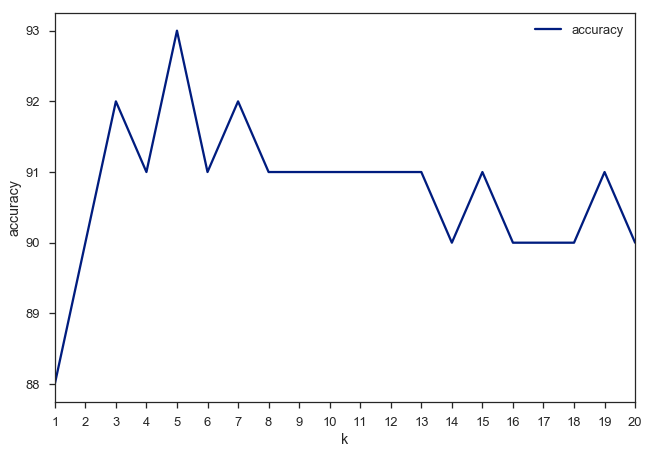

In [248]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = accDf.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));

In [216]:
ax.set_xticks(range(1, 21));

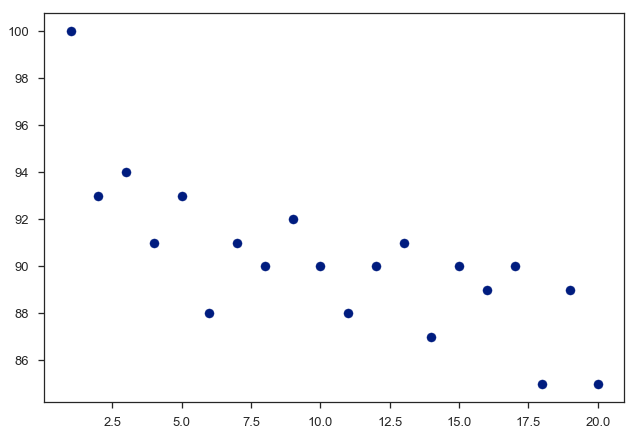

In [241]:
sns.plt.scatter(accDf['k'],accDf['accuracy'])


In [224]:
df.head(3)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.698941,0,1,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676,0
1,0.169849,0,1,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676,0
2,0.925695,0,0,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236,0
